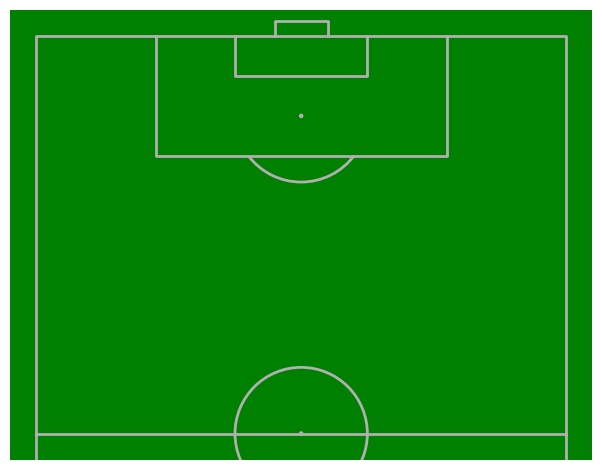

In [8]:
import pandas as pd
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Paste or type your script code here:
from mplsoccer import VerticalPitch
df = pd.read_csv('shots_test.csv')

pitch = VerticalPitch(half=True, pitch_color= 'green', goal_type='box', goal_alpha=1)
fig, ax = pitch.draw()
filtered_df = df[df['isHome'] == True]
filtered_df['yCoord'] = ((filtered_df['yCoord']) * 80)/100
filtered_df.loc[filtered_df['xCoord'] < 120, 'xCoord'] = 119 - filtered_df['xCoord']

In [14]:
filtered_df2 = filtered_df
filtered_df2['EndLocxCoord'] = ((filtered_df['EndLocxCoord']) * 80)/100
filtered_df2['EndLocyCoord']=119
filtered_df2

,Unnamed: 0,name,position,jerseyNumber,isHome,shotType,situation,bodyPart,goalMouthLocation,xg,...,yCoord,GoalMouthxCoord,GoalMouthyCoord,GoalMouthzCoord,BlockxCoord,BlockyCoord,Minute,EndLocxCoord,EndLocyCoord,match_id
0,22,Vinícius Júnior,F,7,True,goal,penalty,right-foot,low-right,0.7884,...,40.0,0,89.888175,7.6,NaN,NaN,18,4.062076,119,11368670


In [10]:
# Create an empty list to store legend handles and labels
legend_labels = {}

for index, row in filtered_df.iterrows():
    if row['shotType'] == 'block':
        color_arrow = 'blue'
        color_start = 'blue'  # lighter shade of blue for start points
        label = 'Block'
    elif row['shotType'] == 'miss':
        color_arrow = 'yellow'
        color_start = 'yellow'  # lighter shade of yellow for start points
        label = 'Miss'
    elif row['shotType'] == 'save':
        color_arrow = 'red'
        color_start = 'red'  # lighter shade of red for start points
        label = 'Save'
    elif row['shotType'] == 'goal':
        color_arrow = 'black'
        color_start = 'black'  # lighter shade of green for start points
        label = 'Goal'

    else:
        color_arrow = 'pink'
        color_start = 'pink'  # lighter shade of green for start points
        label = 'Other'
    
    pitch.arrows(row['yCoord'], row['xCoord'], filtered_df2.loc[index, 'EndLocyCoord'], filtered_df2.loc[index, 'EndLocxCoord'],
                 ax=ax, color=color_arrow, alpha=0.3)
    
    ax.scatter(filtered_df2.loc[index, 'EndLocxCoord'], filtered_df2.loc[index, 'EndLocyCoord'], color=color_arrow, label=label)

    ax.scatter(row['yCoord'], row['xCoord'], color=color_start)

In [11]:

ax.legend(handles=list(legend_labels.values()), loc='lower right')


plt.show()


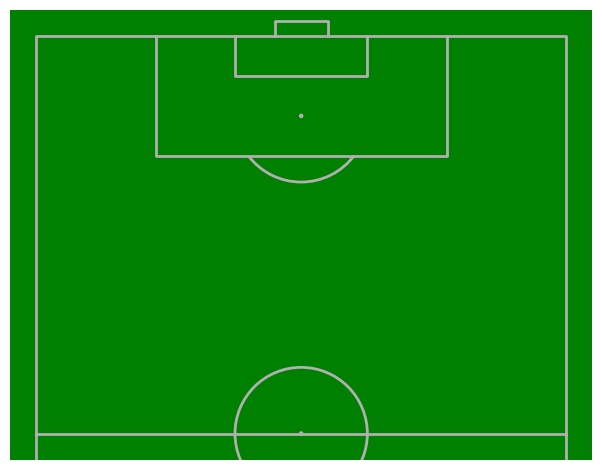